Sampling: [a_trunc_normal]


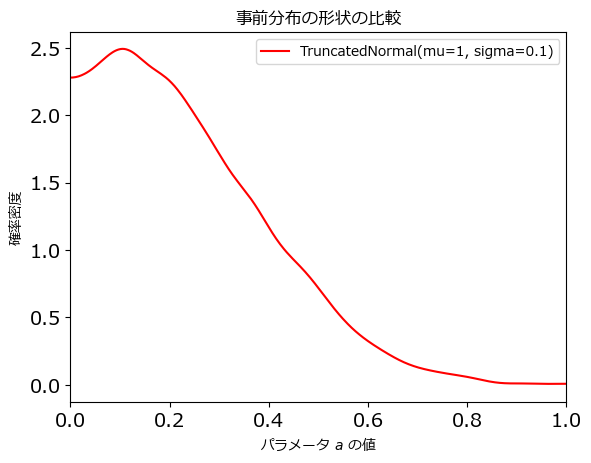

In [1]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# --- 0. プロット設定 ---
plt.rcParams['font.family'] = "Meiryo"
plt.rcParams['figure.dpi'] = 100

# 2つの事前分布を比較
with pm.Model():
    a_trunc_normal = pm.TruncatedNormal('a_trunc_normal', mu=0.1, sigma=0.25, lower=0.0, upper=1.0)

    prior_samples = pm.sample_prior_predictive(samples=10000, random_seed=42)

az.plot_dist(prior_samples.prior['a_trunc_normal'], label='TruncatedNormal(mu=1, sigma=0.1)', color='red')
plt.title('事前分布の形状の比較')
plt.xlabel('パラメータ $a$ の値')
plt.ylabel('確率密度')
plt.legend()
plt.xlim(0, 1.0)
plt.show()


Sampling: [gamma]


gamma パラメータの実際の平均値: 1.08e+11
設定した目標平均値: 1.10e+11
使用したsigma値: 1.38e+11


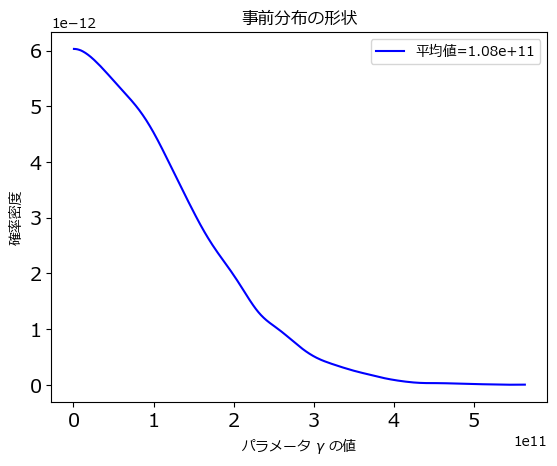

In [4]:
with pm.Model():
    # HalfNormal分布で平均値を110e9にするため、sigma値を計算
    # HalfNormal分布の平均値 = sigma * sqrt(2/π)
    # 110e9 = sigma * sqrt(2/π) → sigma = 110e9 / sqrt(2/π)
    import numpy as np
    desired_mean = 110e9
    sigma_value = desired_mean / np.sqrt(2 / np.pi)
    
    gamma_param = pm.HalfNormal('gamma', sigma=sigma_value)

    prior_samples = pm.sample_prior_predictive(samples=10000, random_seed=42)

# 実際の平均値を計算して表示
actual_mean = np.mean(prior_samples.prior['gamma'])
print(f"gamma パラメータの実際の平均値: {actual_mean:.2e}")
print(f"設定した目標平均値: {desired_mean:.2e}")
print(f"使用したsigma値: {sigma_value:.2e}")

az.plot_dist(prior_samples.prior['gamma'], label=f'平均値={actual_mean:.2e}', color='blue')
plt.title('事前分布の形状')
plt.xlabel('パラメータ $\gamma$ の値')                                      
plt.ylabel('確率密度')
plt.legend()
plt.show()


Sampling: [sigma]


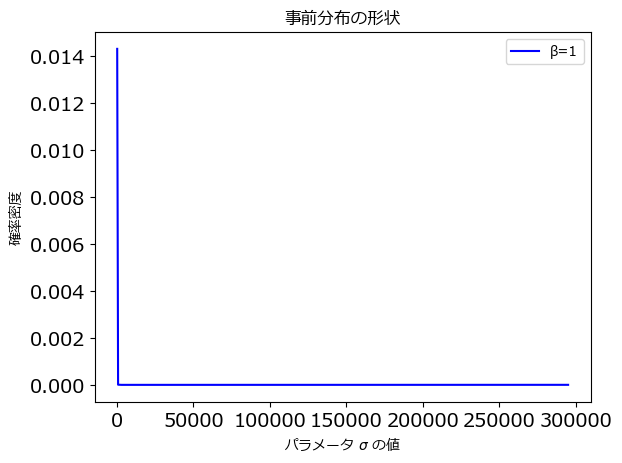

In [3]:
with pm.Model():
    sigma_obs = pm.HalfCauchy('sigma', beta=1.0)

    prior_samples = pm.sample_prior_predictive(samples=10000, random_seed=42)

az.plot_dist(prior_samples.prior['sigma'], label='β=1', color='blue')
plt.title('事前分布の形状')
plt.xlabel('パラメータ $\sigma$ の値')
plt.ylabel('確率密度')
plt.legend()
plt.show()

In [4]:
d = 0.1578e-3
c = 3.0e+8
w_j = 0.25e12

n = c / 2 / d / w_j
eps_r = n**2
print(eps_r) 

14.457343607685525


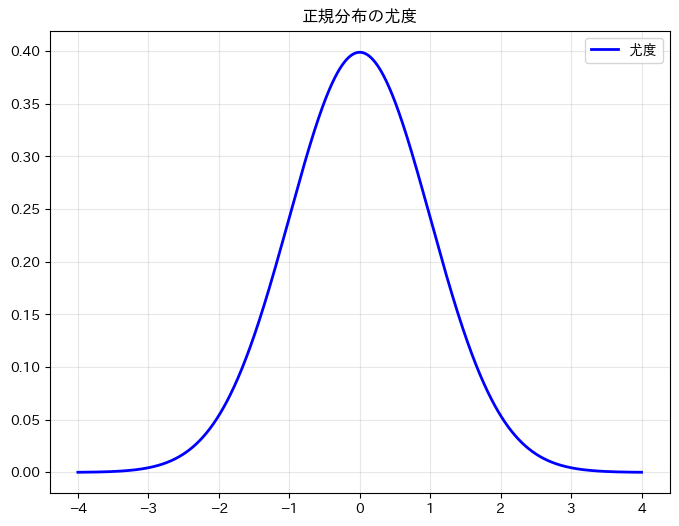

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# 正規分布のグラフをプロット
x = np.linspace(-4, 4, 1000)
y = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b-', linewidth=2, label='尤度')
plt.title('正規分布の尤度')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\taich\AppData\Local\Temp\ipykernel_32696\2034338352.py:88: UserWarning: Glyph 12497 (\N{KATAKANA LETTER PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\taich\AppData\Local\Temp\ipykernel_32696\2034338352.py:88: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\taich\AppData\Local\Temp\ipykernel_32696\2034338352.py:88: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\taich\AppData\Local\Temp\ipykernel_32696\2034338352.py:88: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\taich\AppData\Local\Temp\ipykernel_32696\2034338352.py:88: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\taich\

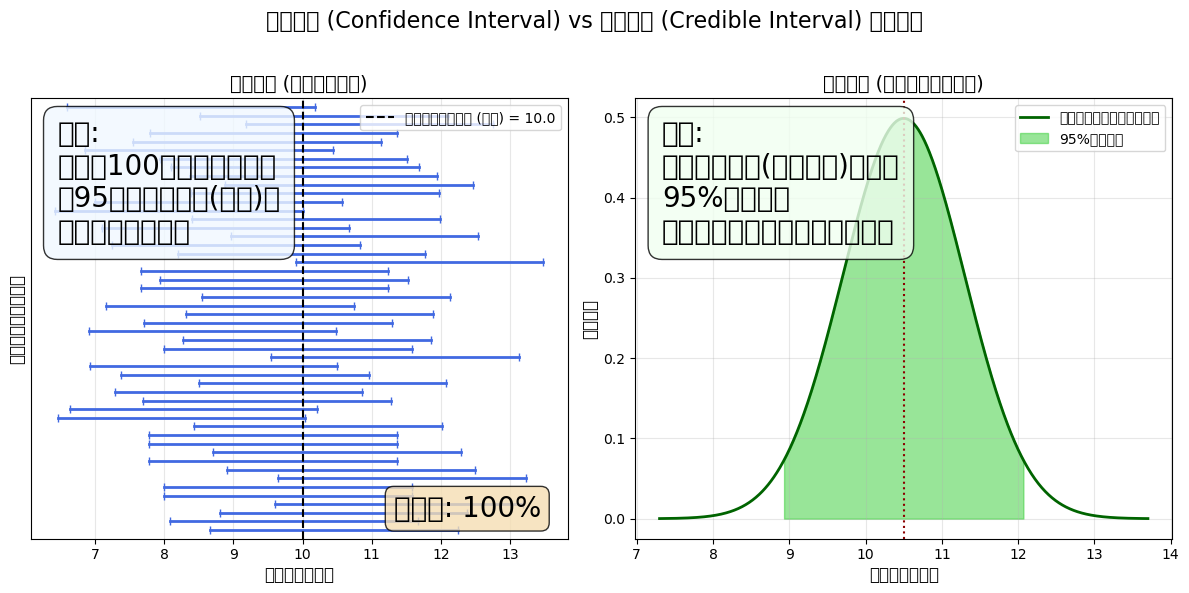

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語表示のためのライブラリ
from scipy.stats import norm

# --- 1. Figure and Subplots Setup ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=100)
fig.suptitle('信頼区間 (Confidence Interval) vs 信用区間 (Credible Interval) の概念図', fontsize=16)

# --- 2. Subplot 1: Confidence Interval ---
ax1.set_title('信頼区間 (誤差論の立場)', fontsize=14)

# Define true parameter and simulation settings
true_parameter = 10.0
n_experiments = 50
confidence_level = 0.95
sample_size = 30
sample_std_dev = 5
std_error = sample_std_dev / np.sqrt(sample_size)
z_score = norm.ppf(1 - (1 - confidence_level) / 2)
interval_half_width = z_score * std_error

# Simulate experiments
np.random.seed(42)
sample_means = np.random.normal(loc=true_parameter, scale=std_error, size=n_experiments)
miss_count = 0

for i in range(n_experiments):
    mean = sample_means[i]
    lower_bound = mean - interval_half_width
    upper_bound = mean + interval_half_width
    
    # Check if the interval captures the true parameter
    if lower_bound > true_parameter or upper_bound < true_parameter:
        color = 'red'
        miss_count += 1
    else:
        color = 'royalblue'
        
    ax1.plot([lower_bound, upper_bound], [i, i], color=color, lw=2, marker='|')

# Plot the true parameter line
ax1.axvline(x=true_parameter, color='black', linestyle='--', label=f'真のパラメータ値 (固定) = {true_parameter}')

# Aesthetics and labels
ax1.set_xlabel('パラメータの値', fontsize=12)
ax1.set_ylabel('実験の繰り返し回数', fontsize=12)
ax1.legend(loc='upper right')
ax1.set_ylim(-1, n_experiments)
ax1.set_yticks([])
ax1.grid(alpha=0.3)
ax1.text(0.05, 0.95, '解釈:\n実験を100回繰り返すと、\n約95個の「区間」(青線)が\n真の値を捉える。', 
         transform=ax1.transAxes, fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='aliceblue', ec='k', alpha=0.8))
ax1.text(0.95, 0.05, f'捕捉率: {100*(n_experiments-miss_count)/n_experiments:.0f}%', 
         transform=ax1.transAxes, fontsize=20, horizontalalignment='right', bbox=dict(boxstyle='round,pad=0.3', fc='wheat', ec='k', alpha=0.8))


# --- 3. Subplot 2: Credible Interval ---
ax2.set_title('信用区間 (ベイズ推定の立場)', fontsize=14)

# Define posterior distribution
posterior_mean = 10.5
posterior_std = 0.8
x = np.linspace(posterior_mean - 4*posterior_std, posterior_mean + 4*posterior_std, 1000)
posterior_pdf = norm.pdf(x, loc=posterior_mean, scale=posterior_std)

# Plot the posterior distribution
ax2.plot(x, posterior_pdf, color='darkgreen', lw=2, label='パラメータの事後確率分布')

# Calculate and shade the credible interval
credible_level = 0.95
lower_bound_cred = norm.ppf((1 - credible_level) / 2, loc=posterior_mean, scale=posterior_std)
upper_bound_cred = norm.ppf(1 - (1 - credible_level) / 2, loc=posterior_mean, scale=posterior_std)
x_fill = np.linspace(lower_bound_cred, upper_bound_cred, 100)
ax2.fill_between(x_fill, norm.pdf(x_fill, loc=posterior_mean, scale=posterior_std), color='limegreen', alpha=0.5, label=f'{100*credible_level:.0f}%信用区間')

# Aesthetics and labels
ax2.set_xlabel('パラメータの値', fontsize=12)
ax2.set_ylabel('確率密度', fontsize=12)
ax2.legend(loc='upper right')
ax2.grid(alpha=0.3)
ax2.axvline(posterior_mean, color='darkred', linestyle=':', label=f'事後分布の平均 = {posterior_mean}')
ax2.text(0.05, 0.95, '解釈:\nこの「区間」(緑の領域)内に、\n95%の確率で\n真のパラメータ値が存在する。', 
         transform=ax2.transAxes, fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='honeydew', ec='k', alpha=0.8))


# --- 4. Final Touches and Save ---
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('intervals_comparison.png')
plt.show()

C:\Users\taich\AppData\Local\Temp\ipykernel_32696\2738806339.py:61: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\taich\AppData\Local\Temp\ipykernel_32696\2738806339.py:61: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\taich\AppData\Local\Temp\ipykernel_32696\2738806339.py:61: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\taich\AppData\Local\Temp\ipykernel_32696\2738806339.py:61: UserWarning: Glyph 12468 (\N{KATAKANA LETTER GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\taich\AppData\Local\Temp\ipykernel_32696\2738806339.py:61: UserWarning: Glyph 12522 (\N{KATAKANA LETTER RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\taich\AppData\Local\Temp\ipykernel_32696\2738806339.py:61: UserWarning: Glyph 12474 (\N{KATAKANA LETTER ZU}) missing from font(

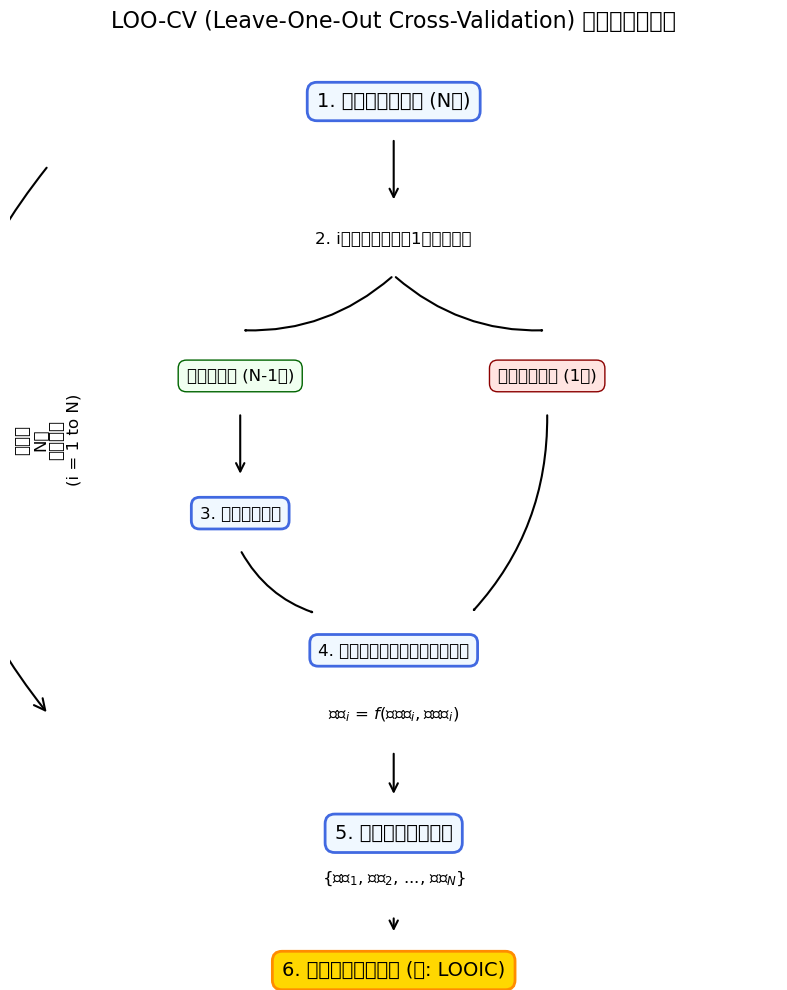

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import japanize_matplotlib  # 日本語表示のためのライブラリ

# --- 1. Figure Setup ---
fig, ax = plt.subplots(figsize=(8, 10), dpi=100)
ax.set_title('LOO-CV (Leave-One-Out Cross-Validation) のアルゴリズム', fontsize=16, pad=20)
ax.axis('off') # Turn off the axes

# --- Define styles for boxes and arrows ---
box_style = dict(boxstyle='round,pad=0.5', fc='aliceblue', ec='royalblue', lw=2)
arrow_style = dict(facecolor='black', edgecolor='black', arrowstyle='->', lw=1.5)

# --- 2. Draw the elements ---

# Step 1: Full Dataset
ax.text(0.5, 0.95, '1. 全データセット (N個)', ha='center', va='center', fontsize=14, bbox=box_style)

# Step 2: Loop explanation
loop_arrow = patches.FancyArrowPatch((0.05, 0.88), (0.05, 0.28),
                                     connectionstyle="arc3,rad=0.4",
                                     **arrow_style, mutation_scale=20)
ax.add_patch(loop_arrow)
ax.text(0.05, 0.58, 'これを\nN回\n繰り返す\n(i = 1 to N)', ha='center', va='center', fontsize=12, rotation=90)


# Step 3: Split Data
ax.text(0.5, 0.80, '2. i番目のデータを1つだけ分離', ha='center', va='center', fontsize=12)
ax.add_patch(patches.FancyArrowPatch((0.5, 0.91), (0.5, 0.84), **arrow_style, mutation_scale=15))

# Training and Test boxes
ax.text(0.3, 0.65, '学習データ (N-1個)', ha='center', va='center', fontsize=12, bbox=dict(boxstyle='round,pad=0.5', fc='honeydew', ec='darkgreen'))
ax.text(0.7, 0.65, 'テストデータ (1個)', ha='center', va='center', fontsize=12, bbox=dict(boxstyle='round,pad=0.5', fc='mistyrose', ec='darkred'))
ax.add_patch(patches.FancyArrowPatch((0.5, 0.76), (0.3, 0.70), connectionstyle="arc3,rad=-0.2", **arrow_style))
ax.add_patch(patches.FancyArrowPatch((0.5, 0.76), (0.7, 0.70), connectionstyle="arc3,rad=0.2", **arrow_style))

# Step 4: Train Model
ax.text(0.3, 0.50, '3. モデルを学習', ha='center', va='center', fontsize=12, bbox=box_style)
ax.add_patch(patches.FancyArrowPatch((0.3, 0.61), (0.3, 0.54), **arrow_style, mutation_scale=15))


# Step 5: Predict and Calculate Error
ax.text(0.5, 0.35, '4. 予測値を計算し、誤差を記録', ha='center', va='center', fontsize=12, bbox=box_style)
ax.add_patch(patches.FancyArrowPatch((0.3, 0.46), (0.4, 0.39), connectionstyle="arc3,rad=0.2", **arrow_style))
ax.add_patch(patches.FancyArrowPatch((0.7, 0.61), (0.6, 0.39), connectionstyle="arc3,rad=-0.2", **arrow_style))
ax.text(0.5, 0.28, r'誤差$_i$ = $f(\mathrm{予測値}_i, \mathrm{実測値}_i)$', ha='center', va='center', fontsize=12)


# Step 6: Aggregate
ax.text(0.5, 0.15, '5. 全ての誤差を収集', ha='center', va='center', fontsize=14, bbox=box_style)
ax.add_patch(patches.FancyArrowPatch((0.5, 0.24), (0.5, 0.19), **arrow_style, mutation_scale=15))
ax.text(0.5, 0.10, r'{誤差$_1$, 誤差$_2$, ..., 誤差$_N$}', ha='center', va='center', fontsize=12)


# Step 7: Final Score
ax.text(0.5, 0.0, '6. 最終スコアを算出 (例: LOOIC)', ha='center', va='center', fontsize=14, bbox=dict(boxstyle='round,pad=0.5', fc='gold', ec='darkorange', lw=2))
ax.add_patch(patches.FancyArrowPatch((0.5, 0.06), (0.5, 0.04), **arrow_style, mutation_scale=15))


# --- Final Touches ---
plt.tight_layout()
plt.savefig('loocv_algorithm_jp.png')
plt.show()